In [55]:
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('alistamento_militar_2022.csv')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300914 entries, 0 to 300913
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300914 non-null  int64  
 1   ANO_NASCIMENTO    300914 non-null  int64  
 2   PESO              300914 non-null  float64
 3   ALTURA            300914 non-null  float64
 4   CABECA            300914 non-null  float64
 5   CALCADO           300914 non-null  float64
 6   CINTURA           300914 non-null  float64
 7   MUN_NASCIMENTO    300914 non-null  object 
 8   UF_NASCIMENTO     300914 non-null  object 
 9   PAIS_NASCIMENTO   300914 non-null  object 
 10  ESTADO_CIVIL      300914 non-null  object 
 11  SEXO              300914 non-null  object 
 12  ESCOLARIDADE      300914 non-null  object 
 13  VINCULACAO_ANO    300914 non-null  int64  
 14  DISPENSA          300914 non-null  object 
 15  ZONA_RESIDENCIAL  300914 non-null  object 
 16  MUN_RESIDENCIA    30

In [4]:
df.head()

,Unnamed: 0,ANO_NASCIMENTO,PESO,ALTURA,CABECA,CALCADO,CINTURA,MUN_NASCIMENTO,UF_NASCIMENTO,PAIS_NASCIMENTO,...,ESCOLARIDADE,VINCULACAO_ANO,DISPENSA,ZONA_RESIDENCIAL,MUN_RESIDENCIA,UF_RESIDENCIA,PAIS_RESIDENCIA,JSM,MUN_JSM,UF_JSM
0,1,1995,79.0,181.0,56.0,41.0,88.0,PALMEIRA DAS MISSOES,RS,BRASIL,...,Ensino Médio Completo,2022,Com dispensa,Urbana,CANOAS,RS,BRASIL,10/52 - PALMEIRA DAS MISSOES,PALMEIRA DAS MISSOES,RS
1,2,1974,64.0,165.0,58.0,38.0,75.0,PORTO ALEGRE,RS,BRASIL,...,7° Ano - Ensino Fundamental,2022,Com dispensa,Urbana,ITAJAI,SC,BRASIL,16/28 - ITAJAI,ITAJAI,SC
2,3,1998,55.0,180.0,53.0,41.0,74.0,JANDIRA,SP,BRASIL,...,Ensino Médio Completo,2022,Com dispensa,Urbana,SERTAOZINHO,SP,BRASIL,5/123 - SERTAOZINHO,SERTAOZINHO,SP
3,4,1999,76.0,186.0,57.0,42.0,88.0,CACERES,MT,BRASIL,...,3° Ano - Ensino Médio,2022,Com dispensa,Urbana,CACERES,MT,BRASIL,30/24 - CACERES,CACERES,MT
4,5,2000,76.0,184.0,58.0,42.0,78.0,BRASILIA,DF,BRASIL,...,2° Semestre - Ensino Superior,2022,Com dispensa,Rural,BRASILIA,DF,BRASIL,7/331 - BRASILIA (SAMAMBAIA),BRASILIA,DF


In [58]:
contagem_nascimento= df['UF_NASCIMENTO'].value_counts()

contagem_residencia= df['UF_RESIDENCIA'].value_counts()


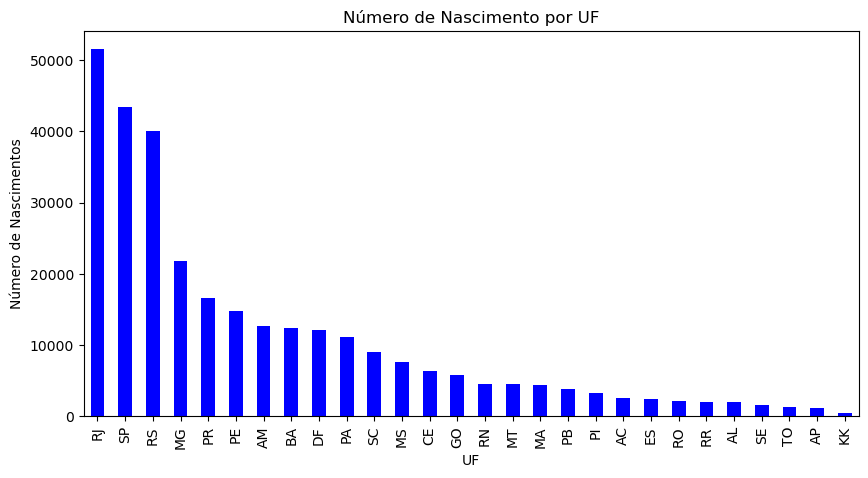

In [59]:
# Gráfico de barras para UF Nascimento
plt.figure(figsize=(10,5))
contagem_nascimento.plot(kind='bar', color= 'blue')
plt.title('Número de Nascimento por UF')
plt.xlabel('UF')
plt.ylabel('Número de Nascimentos')
plt.show()

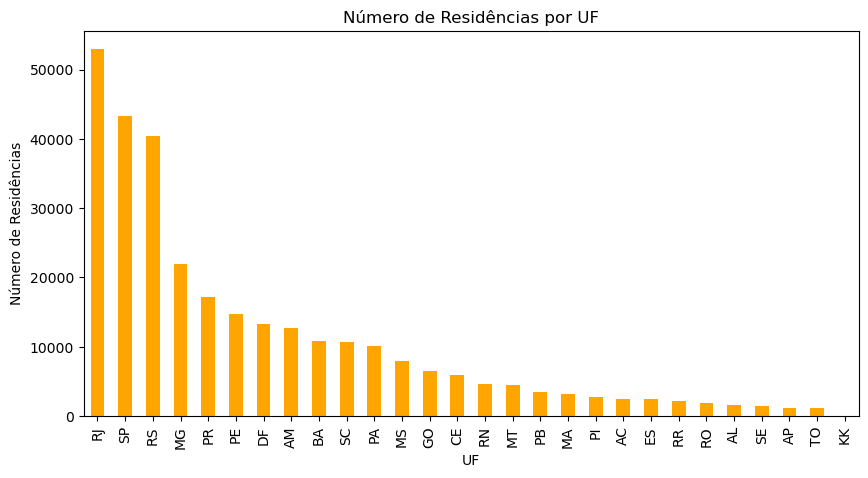

In [60]:
# Gráfico de barras para UF de Residência
plt.figure(figsize=(10,5))
contagem_residencia.plot(kind='bar', color='orange')
plt.title('Número de Residências por UF')
plt.xlabel('UF')
plt.ylabel('Número de Residências')
plt.show()

<Axes: >

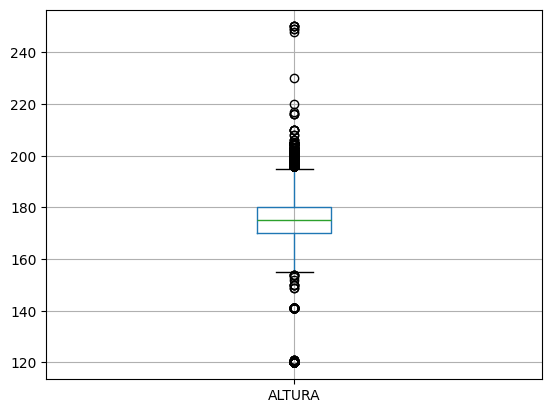

In [12]:
df[['ALTURA']].boxplot()

In [9]:
df['ALTURA'].max()

250.0

In [10]:
df['ALTURA'].min()

120.0

In [11]:
df['ALTURA'].mode()

0    175.0
Name: ALTURA, dtype: float64

In [61]:
df[['ANO_NASCIMENTO', 'PESO', 'ALTURA', 'CALCADO', 'CINTURA']].mean().apply(lambda x: round(x, 2))

ANO_NASCIMENTO    2003.64
PESO                70.13
ALTURA             174.42
CALCADO             40.96
CINTURA             77.29
dtype: float64

In [62]:
dispensas=df['DISPENSA'].value_counts()

In [106]:
dispensas

DISPENSA
Com dispensa    193913
Sem dispensa    107001
Name: count, dtype: int64

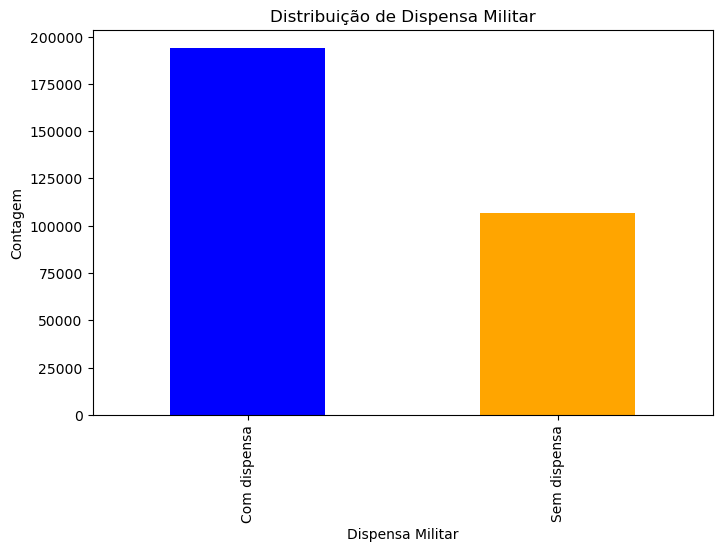

In [63]:
# Distribuição de dispensa militar
plt.figure(figsize=(8,5))
dispensas.plot(kind='bar', color=['blue','orange'])
plt.title('Distribuição de Dispensa Militar')
plt.xlabel('Dispensa Militar')
plt.ylabel('Contagem')
plt.show()

In [64]:
#Alterando a coluna de Id
df.set_index('Unnamed: 0', inplace=True)
df.columns

Index(['ANO_NASCIMENTO', 'PESO', 'ALTURA', 'CABECA', 'CALCADO', 'CINTURA',
       'MUN_NASCIMENTO', 'UF_NASCIMENTO', 'PAIS_NASCIMENTO', 'ESTADO_CIVIL',
       'SEXO', 'ESCOLARIDADE', 'VINCULACAO_ANO', 'DISPENSA',
       'ZONA_RESIDENCIAL', 'MUN_RESIDENCIA', 'UF_RESIDENCIA',
       'PAIS_RESIDENCIA', 'JSM', 'MUN_JSM', 'UF_JSM'],
      dtype='object')

In [65]:
#Criando uma coluna com a idade dos alistados no ano que se alistaram 
df['Idade_alistado'] = df['VINCULACAO_ANO'] - df['ANO_NASCIMENTO'] 


In [66]:
#Conferindo alistados acima de 25 anos
alistados_25 = df.loc[df['Idade_alistado'] >= 25, ['MUN_NASCIMENTO','Idade_alistado']]
alistados_25

,MUN_NASCIMENTO,Idade_alistado
Unnamed: 0,,
1,PALMEIRA DAS MISSOES,27
2,PORTO ALEGRE,48
21,SAO PAULO,25
26,SANTANA,25
62,MANACAPURU,27
...,...,...
299528,TEOFILO OTONI,26
300641,GUACUI,26
300736,LIMOEIRO,25


In [67]:
#Media da idade de alistamento
round(df['Idade_alistado'].mean(), 2)

18.36

### Criação e atribuição de valores à coluna 'IMC' e 'CLASSIFICACAO_IMC'

In [68]:
# Criação da coluna referente ao IMC de cada pessoa 

df['IMC'] = df['PESO']/((df['ALTURA']/100)**2)
df['IMC'] = round(df['IMC'], 2)

In [69]:
# Criação da coluna referente à CLASSIFICAÇÃO DO IMC de cada pessoa 

df.loc[df['IMC'] < 16.9, 'CLASSIFICACAO_IMC'] = 'Muito Abaixo do Peso'
df.loc[(df['IMC'] >= 16.9) & (df['IMC'] < 18.4), 'CLASSIFICACAO_IMC'] = 'Abaixo do Peso'
df.loc[(df['IMC'] >= 18.4) & (df['IMC'] < 24.9), 'CLASSIFICACAO_IMC'] = 'Peso Normal'
df.loc[(df['IMC'] >= 24.9) & (df['IMC'] < 29.9), 'CLASSIFICACAO_IMC'] = 'Acima do Peso'
df.loc[(df['IMC'] >= 29.9) & (df['IMC'] < 34.9), 'CLASSIFICACAO_IMC'] = 'Obesidade Grau 1'
df.loc[(df['IMC'] >= 34.9) & (df['IMC'] < 40), 'CLASSIFICACAO_IMC'] = 'Obesidade Grau 2'
df.loc[(df['IMC'] >= 40), 'CLASSIFICACAO_IMC'] = 'Obesidade Grau 3'

In [71]:
muito_abaixo_do_peso = df[df['CLASSIFICACAO_IMC'] == 'Muito Abaixo do Peso'].value_counts()
peso_normal = df['CLASSIFICACAO_IMC'][df['CLASSIFICACAO_IMC'] == 'Peso Normal'].value_counts()
acima_do_peso = df['CLASSIFICACAO_IMC'][df['CLASSIFICACAO_IMC'] == 'Acima do Peso'].value_counts()
obesidade_1 = df['CLASSIFICACAO_IMC'][df['CLASSIFICACAO_IMC'] == 'Obesidade Grau 1'].value_counts()
obesidade_2 = df['CLASSIFICACAO_IMC'][df['CLASSIFICACAO_IMC'] == 'Obesidade Grau 2'].value_counts()
obesidade_3 = df['CLASSIFICACAO_IMC'][df['CLASSIFICACAO_IMC'] == 'Obesidade Grau 3'].value_counts()

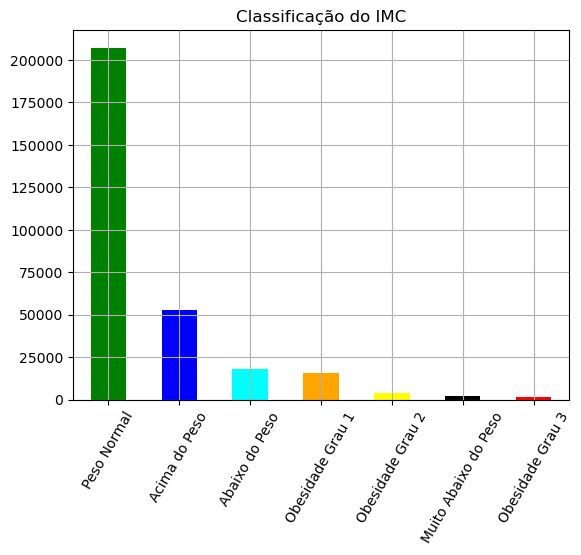

In [174]:
df['CLASSIFICACAO_IMC'].value_counts().plot(kind = 'bar', color=['green', 'blue', 'cyan', 'orange', 'yellow', 'black', 'red'])
plt.grid(True)
plt.plot()
plt.xlabel('')
plt.title('Classificação do IMC')
plt.xticks(rotation=60)

plt.show()

### Criação e atribuição de valores à coluna 'REGIAO_NASCIMENTO' e 'REGIAO_RESIDENCIA'

In [80]:
regioes = {'Norte': ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'], 
           'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
           'Centro-Oeste': ['DF', 'GO', 'MT', 'MS'],
           'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
           'Sul': ['PR', 'RS', 'SC']}

In [91]:
for i in range(len(regioes['Norte'])):
    print(f"(df['UF_NASCIMENTO'] == regioes['Norte'][{i}])|")

(df['UF_NASCIMENTO'] == regioes['Norte'][0])|
(df['UF_NASCIMENTO'] == regioes['Norte'][1])|
(df['UF_NASCIMENTO'] == regioes['Norte'][2])|
(df['UF_NASCIMENTO'] == regioes['Norte'][3])|
(df['UF_NASCIMENTO'] == regioes['Norte'][4])|
(df['UF_NASCIMENTO'] == regioes['Norte'][5])|
(df['UF_NASCIMENTO'] == regioes['Norte'][6])|


In [86]:
df.loc[(df['UF_NASCIMENTO'] == regioes['Norte'][0])|
       (df['UF_NASCIMENTO'] == regioes['Norte'][1])|
       (df['UF_NASCIMENTO'] == regioes['Norte'][2])|
       (df['UF_NASCIMENTO'] == regioes['Norte'][3])|
       (df['UF_NASCIMENTO'] == regioes['Norte'][4])|
       (df['UF_NASCIMENTO'] == regioes['Norte'][5])|
       (df['UF_NASCIMENTO'] == regioes['Norte'][6]), 'REGIAO_NASCIMENTO'] = 'Norte'

In [95]:
for i in range(len(regioes['Nordeste'])):
    print(f"(df['UF_NASCIMENTO'] == regioes['Nordeste'][{i}])|")

(df['UF_NASCIMENTO'] == regioes['Nordeste'][0])|
(df['UF_NASCIMENTO'] == regioes['Nordeste'][1])|
(df['UF_NASCIMENTO'] == regioes['Nordeste'][2])|
(df['UF_NASCIMENTO'] == regioes['Nordeste'][3])|
(df['UF_NASCIMENTO'] == regioes['Nordeste'][4])|
(df['UF_NASCIMENTO'] == regioes['Nordeste'][5])|
(df['UF_NASCIMENTO'] == regioes['Nordeste'][6])|
(df['UF_NASCIMENTO'] == regioes['Nordeste'][7])|
(df['UF_NASCIMENTO'] == regioes['Nordeste'][8])|


In [96]:
df.loc[(df['UF_NASCIMENTO'] == regioes['Nordeste'][0])|
       (df['UF_NASCIMENTO'] == regioes['Nordeste'][1])|
       (df['UF_NASCIMENTO'] == regioes['Nordeste'][2])|
       (df['UF_NASCIMENTO'] == regioes['Nordeste'][3])|
       (df['UF_NASCIMENTO'] == regioes['Nordeste'][4])|
       (df['UF_NASCIMENTO'] == regioes['Nordeste'][5])|
       (df['UF_NASCIMENTO'] == regioes['Nordeste'][6])|
       (df['UF_NASCIMENTO'] == regioes['Nordeste'][7])|
       (df['UF_NASCIMENTO'] == regioes['Nordeste'][8]), 'REGIAO_NASCIMENTO'] = 'Nordeste'

In [97]:
for i in range(len(regioes['Centro-Oeste'])):
    print(f"(df['UF_NASCIMENTO'] == regioes['Centro-Oeste'][{i}])|")

(df['UF_NASCIMENTO'] == regioes['Centro-Oeste'][0])|
(df['UF_NASCIMENTO'] == regioes['Centro-Oeste'][1])|
(df['UF_NASCIMENTO'] == regioes['Centro-Oeste'][2])|
(df['UF_NASCIMENTO'] == regioes['Centro-Oeste'][3])|


In [107]:
df.loc[(df['UF_NASCIMENTO'] == regioes['Centro-Oeste'][0])|
(df['UF_NASCIMENTO'] == regioes['Centro-Oeste'][1])|
(df['UF_NASCIMENTO'] == regioes['Centro-Oeste'][2])|
(df['UF_NASCIMENTO'] == regioes['Centro-Oeste'][3]), 'REGIAO_NASCIMENTO'] = 'Centro-Oeste'

In [108]:
for i in range(len(regioes['Sudeste'])):
    print(f"(df['UF_NASCIMENTO'] == regioes['Sudeste'][{i}])|")

(df['UF_NASCIMENTO'] == regioes['Sudeste'][0])|
(df['UF_NASCIMENTO'] == regioes['Sudeste'][1])|
(df['UF_NASCIMENTO'] == regioes['Sudeste'][2])|
(df['UF_NASCIMENTO'] == regioes['Sudeste'][3])|


In [109]:
df.loc[(df['UF_NASCIMENTO'] == regioes['Sudeste'][0])|
(df['UF_NASCIMENTO'] == regioes['Sudeste'][1])|
(df['UF_NASCIMENTO'] == regioes['Sudeste'][2])|
(df['UF_NASCIMENTO'] == regioes['Sudeste'][3]), 'REGIAO_NASCIMENTO'] = 'Sudeste'

In [110]:
for i in range(len(regioes['Sul'])):
    print(f"(df['UF_NASCIMENTO'] == regioes['Sul'][{i}])|")

(df['UF_NASCIMENTO'] == regioes['Sul'][0])|
(df['UF_NASCIMENTO'] == regioes['Sul'][1])|
(df['UF_NASCIMENTO'] == regioes['Sul'][2])|


In [111]:
df.loc[(df['UF_NASCIMENTO'] == regioes['Sul'][0])|
(df['UF_NASCIMENTO'] == regioes['Sul'][1])|
(df['UF_NASCIMENTO'] == regioes['Sul'][2]), 'REGIAO_NASCIMENTO'] = 'Sul'

In [119]:
df.loc[(df['UF_RESIDENCIA'] == regioes['Norte'][0])|
       (df['UF_RESIDENCIA'] == regioes['Norte'][1])|
       (df['UF_RESIDENCIA'] == regioes['Norte'][2])|
       (df['UF_RESIDENCIA'] == regioes['Norte'][3])|
       (df['UF_RESIDENCIA'] == regioes['Norte'][4])|
       (df['UF_RESIDENCIA'] == regioes['Norte'][5])|
       (df['UF_RESIDENCIA'] == regioes['Norte'][6]), 'REGIAO_RESIDENCIA'] = 'Norte'

df.loc[(df['UF_RESIDENCIA'] == regioes['Nordeste'][0])|
       (df['UF_RESIDENCIA'] == regioes['Nordeste'][1])|
       (df['UF_RESIDENCIA'] == regioes['Nordeste'][2])|
       (df['UF_RESIDENCIA'] == regioes['Nordeste'][3])|
       (df['UF_RESIDENCIA'] == regioes['Nordeste'][4])|
       (df['UF_RESIDENCIA'] == regioes['Nordeste'][5])|
       (df['UF_RESIDENCIA'] == regioes['Nordeste'][6])|
       (df['UF_RESIDENCIA'] == regioes['Nordeste'][7])|
       (df['UF_RESIDENCIA'] == regioes['Nordeste'][8]), 'REGIAO_RESIDENCIA'] = 'Nordeste'

df.loc[(df['UF_RESIDENCIA'] == regioes['Centro-Oeste'][0])|
       (df['UF_RESIDENCIA'] == regioes['Centro-Oeste'][1])|
       (df['UF_RESIDENCIA'] == regioes['Centro-Oeste'][2])|
       (df['UF_RESIDENCIA'] == regioes['Centro-Oeste'][3]), 'REGIAO_RESIDENCIA'] = 'Centro-Oeste'

df.loc[(df['UF_RESIDENCIA'] == regioes['Sudeste'][0])|
       (df['UF_RESIDENCIA'] == regioes['Sudeste'][1])|
       (df['UF_RESIDENCIA'] == regioes['Sudeste'][2])|
       (df['UF_RESIDENCIA'] == regioes['Sudeste'][3]), 'REGIAO_RESIDENCIA'] = 'Sudeste'

df.loc[(df['UF_RESIDENCIA'] == regioes['Sul'][0])|
       (df['UF_RESIDENCIA'] == regioes['Sul'][1])|
       (df['UF_RESIDENCIA'] == regioes['Sul'][2]), 'REGIAO_RESIDENCIA'] = 'Sul'

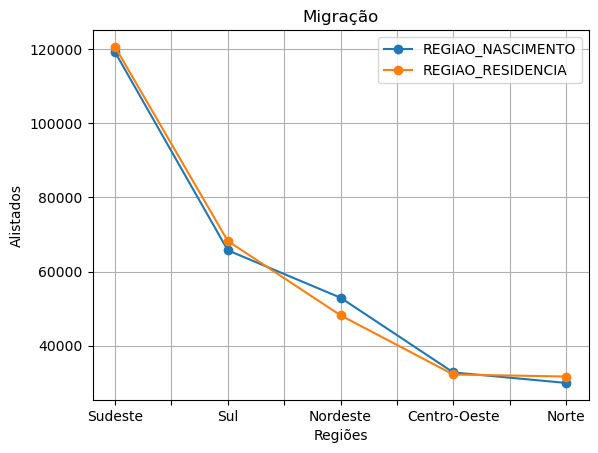

In [170]:
df['REGIAO_NASCIMENTO'].value_counts().plot(kind = 'line', marker = 'o', label = 'REGIAO_NASCIMENTO')
df['REGIAO_RESIDENCIA'].value_counts().plot(kind = 'line', marker = 'o', label = 'REGIAO_RESIDENCIA')
plt.legend()
plt.grid(True)
plt.xlabel('Regiões')
plt.ylabel('Alistados')
plt.title('Migração')

plt.show()

In [266]:
reg = df[['REGIAO_NASCIMENTO', 'REGIAO_RESIDENCIA']][df['REGIAO_NASCIMENTO'] != df['REGIAO_RESIDENCIA']].sort_values(by = 'REGIAO_RESIDENCIA').value_counts().groupby('REGIAO_NASCIMENTO')

In [272]:
df[['REGIAO_NASCIMENTO', 'REGIAO_RESIDENCIA']][df['REGIAO_NASCIMENTO'] != df['REGIAO_RESIDENCIA']].sort_values(by = 'REGIAO_RESIDENCIA').value_counts()

REGIAO_NASCIMENTO  REGIAO_RESIDENCIA
Nordeste           Sudeste              3519
                   Centro-Oeste         1756
Sudeste            Sul                  1433
                   Nordeste             1187
                   Centro-Oeste         1074
Norte              Sul                   707
                   Centro-Oeste          680
Nordeste           Sul                   655
Centro-Oeste       Sudeste               632
Nordeste           Norte                 576
Norte              Sudeste               505
Sul                Sudeste               500
Centro-Oeste       Sul                   495
Sul                Centro-Oeste          293
Norte              Nordeste              251
Centro-Oeste       Nordeste              251
                   Norte                 194
Sudeste            Norte                 175
Sul                Norte                  63
                   Nordeste               62
Name: count, dtype: int64

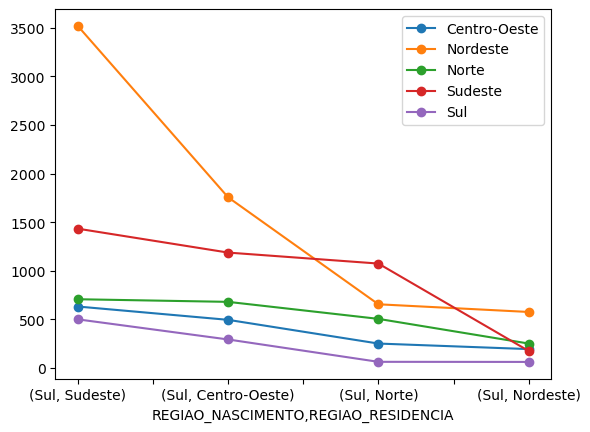

In [270]:
reg.plot(marker = 'o')
plt.legend()

plt.show()

### Escolaridade

In [181]:
df['ESCOLARIDADE'].unique()

array(['Ensino Médio Completo', '7° Ano - Ensino Fundamental',
       '3° Ano - Ensino Médio', '2° Semestre - Ensino Superior',
       '2° Ano - Ensino Médio', '9° Ano - Ensino Fundamental',
       '1° Ano - Ensino Médio', '3° Semestre - Ensino Superior',
       '1° Semestre - Ensino Superior', '4° Semestre - Ensino Superior',
       '4° Ano - Ensino Médio (Profissionalizante)',
       'Ensino Superior Completo', '6° Ano - Ensino Fundamental',
       '5° Ano - Ensino Fundamental', '8° Ano - Ensino Fundamental',
       '6° Semestre - Ensino Superior', '3° Ano - Ensino Fundamental',
       'Ensino Fundamental Completo', '1° Ano - Ensino Fundamental',
       '5° Semestre - Ensino Superior', '2° Ano - Ensino Fundamental',
       '9° Semestre - Ensino Superior', '10° Semestre - Ensino Superior',
       '7° Semestre - Ensino Superior', 'Alfabetizado',
       '4° Ano - Ensino Fundamental', '8° Semestre - Ensino Superior',
       'Pós-Graduaç╞o', 'Analfabeto'], dtype=object)

In [190]:
df.columns

Index(['ANO_NASCIMENTO', 'PESO', 'ALTURA', 'CABECA', 'CALCADO', 'CINTURA',
       'MUN_NASCIMENTO', 'UF_NASCIMENTO', 'PAIS_NASCIMENTO', 'ESTADO_CIVIL',
       'SEXO', 'ESCOLARIDADE', 'VINCULACAO_ANO', 'DISPENSA',
       'ZONA_RESIDENCIAL', 'MUN_RESIDENCIA', 'UF_RESIDENCIA',
       'PAIS_RESIDENCIA', 'JSM', 'MUN_JSM', 'UF_JSM', 'Idade_alistado', 'IMC',
       'CLASSIFICACAO_IMC', 'REGIAO_NASCIMENTO', 'REGIAO_RESIDENCIA'],
      dtype='object')

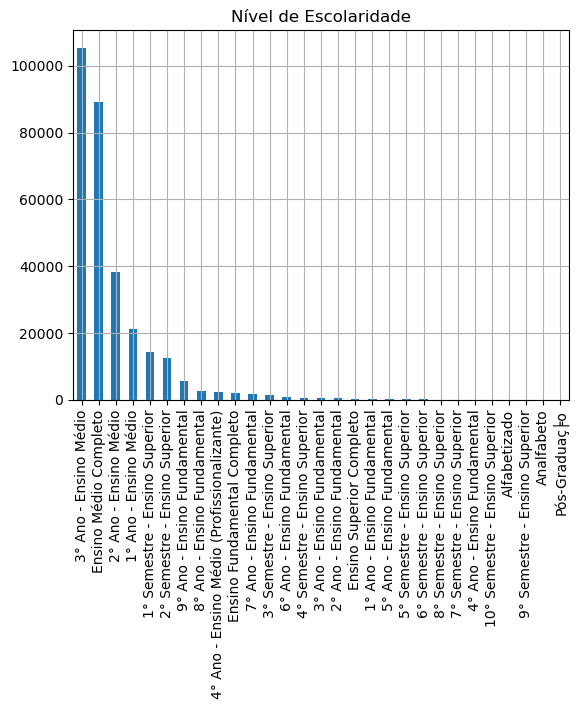

In [210]:
df['ESCOLARIDADE'].value_counts().plot(kind = 'bar')
plt.grid()
plt.xlabel('')
plt.title('Nível de Escolaridade')
plt.show()